In [65]:
import pandas as pd
import numpy as np

In [66]:
data = pd.read_csv('../data/merged_df.csv', index_col=0)

In [67]:
data

,slug,name,positions,age,team_feature,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,season,nba_id,player_name,pos,team_target,oepm,depm,epm,ewins,feature_season
0,acyqu01,Quincy Acy,POWER FORWARD,22,TORONTO RAPTORS,29,342,15.9,0.632,0.027,...,2014,203112,Quincy Acy,SF,SAC,-2.241340,-0.860686,-3.102020,-0.088588,2013
1,adrieje01,Jeff Adrien,POWER FORWARD,26,CHARLOTTE BOBCATS,52,713,13.4,0.493,0.012,...,2014,202399,Jeff Adrien,PF,MIL,-0.222416,-2.017500,-2.239920,0.475259,2013
2,afflaar01,Arron Afflalo,SMALL FORWARD,27,ORLANDO MAGIC,64,2307,13.0,0.527,0.265,...,2014,201167,Arron Afflalo,SG,ORL,1.483060,-2.289410,-0.806353,3.702980,2013
3,aldrico01,Cole Aldrich,CENTER,24,HOUSTON ROCKETS,30,213,7.3,0.532,0.000,...,2014,202332,Cole Aldrich,C,NYK,-1.103380,1.572910,0.469531,0.767896,2013
4,aldrico01,Cole Aldrich,CENTER,24,SACRAMENTO KINGS,15,175,15.7,0.598,0.000,...,2014,202332,Cole Aldrich,C,NYK,-1.103380,1.572910,0.469531,0.767896,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,youngth01,Thaddeus Young,POWER FORWARD,30,INDIANA PACERS,81,2489,16.2,0.569,0.174,...,2020,201152,Thaddeus Young,PF,CHI,-2.751630,1.493800,-1.257840,1.837610,2019
3762,youngtr01,Trae Young,POINT GUARD,20,ATLANTA HAWKS,81,2503,17.0,0.539,0.384,...,2020,1629027,Trae Young,PG,ATL,5.990290,-2.527340,3.462950,9.214310,2019
3763,zelleco01,Cody Zeller,CENTER,26,CHARLOTTE HORNETS,49,1243,17.2,0.611,0.064,...,2020,203469,Cody Zeller,C,CHA,0.510248,-1.543110,-1.032870,1.746270,2019
3764,zubaciv01,Ivica Zubac,CENTER,21,LOS ANGELES LAKERS,33,516,19.5,0.633,0.000,...,2020,1627826,Ivica Zubac,C,LAC,1.936290,4.284770,6.221060,8.295400,2019


In [68]:
data.columns

Index(['slug', 'name', 'positions', 'age', 'team_feature', 'games_played',
       'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player', 'is_combined_totals',
       'year_end', 'season', 'nba_id', 'player_name', 'pos', 'team_target',
       'oepm', 'depm', 'epm', 'ewins', 'feature_season'],
      dtype='object')

In [69]:
data = data[data.games_played >= 10] # remove players who played less than 10 games

In [70]:
mid_season_transfers_df = data[data.duplicated(subset=['name', 'year_end'])][['name', 'season']]
mid_season_transfers = list(zip(mid_season_transfers_df['name'].values, mid_season_transfers_df['season'].values))

In [71]:
len(mid_season_transfers)

290

In [72]:
for name, year in mid_season_transfers:
    data = data[(data['name'] != name) | (data['season'] != year)]

In [73]:
data

,slug,name,positions,age,team_feature,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,season,nba_id,player_name,pos,team_target,oepm,depm,epm,ewins,feature_season
0,acyqu01,Quincy Acy,POWER FORWARD,22,TORONTO RAPTORS,29,342,15.9,0.632,0.027,...,2014,203112,Quincy Acy,SF,SAC,-2.241340,-0.860686,-3.102020,-0.088588,2013
1,adrieje01,Jeff Adrien,POWER FORWARD,26,CHARLOTTE BOBCATS,52,713,13.4,0.493,0.012,...,2014,202399,Jeff Adrien,PF,MIL,-0.222416,-2.017500,-2.239920,0.475259,2013
2,afflaar01,Arron Afflalo,SMALL FORWARD,27,ORLANDO MAGIC,64,2307,13.0,0.527,0.265,...,2014,201167,Arron Afflalo,SG,ORL,1.483060,-2.289410,-0.806353,3.702980,2013
5,aldrila01,LaMarcus Aldridge,POWER FORWARD,27,PORTLAND TRAIL BLAZERS,74,2790,20.4,0.530,0.011,...,2014,200746,LaMarcus Aldridge,PF,POR,1.502790,1.370200,2.872990,9.896980,2013
6,allenla01,Lavoy Allen,CENTER,23,PHILADELPHIA 76ERS,79,1669,11.5,0.474,0.002,...,2014,202730,Lavoy Allen,C,IND,-2.155130,-0.720854,-2.875990,0.054738,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,winslju01,Justise Winslow,SMALL FORWARD,22,MIAMI HEAT,66,1959,12.8,0.513,0.342,...,2020,1626159,Justise Winslow,SF,MEM,-3.326920,1.055980,-2.270930,0.159798,2019
3757,woodch01,Christian Wood,POWER FORWARD,23,MILWAUKEE BUCKS,13,62,17.1,0.585,0.200,...,2020,1626174,Christian Wood,PF,DET,2.316110,1.421040,3.737150,6.029440,2019
3761,youngth01,Thaddeus Young,POWER FORWARD,30,INDIANA PACERS,81,2489,16.2,0.569,0.174,...,2020,201152,Thaddeus Young,PF,CHI,-2.751630,1.493800,-1.257840,1.837610,2019
3762,youngtr01,Trae Young,POINT GUARD,20,ATLANTA HAWKS,81,2503,17.0,0.539,0.384,...,2020,1629027,Trae Young,PG,ATL,5.990290,-2.527340,3.462950,9.214310,2019


In [74]:
data[data.duplicated(subset=['name', 'year_end'])][['name', 'season']] # sucessfully removed midseason transfers

,name,season


In [75]:
# split train and test
data.year_end.value_counts().sort_index()

2013    314
2014    319
2015    311
2016    319
2017    317
2018    330
2019    306
2020    343
2021    353
Name: year_end, dtype: int64

In [76]:
data.season.value_counts().sort_index()

2014    314
2015    319
2016    311
2017    319
2018    317
2019    330
2020    306
2021    343
2022    353
Name: season, dtype: int64

In [77]:
train = data[data.season != 2022]
test = data[data.season == 2022]

In [78]:
features = ['season', 'age', 'games_played',
       'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player']

In [79]:
X_train = train[features]
X_test = test[features]

In [80]:
# normalize features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = pd.DataFrame(mms.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test), columns= X_test.columns)

In [81]:
X_train['position'] = train['positions']
X_test['position'] = test['positions']

In [82]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [83]:
from sklearn.model_selection import cross_val_score
def eval_model(model):
    cv = cross_val_score(model, X_train, train['epm'], cv = 5, scoring='neg_mean_absolute_error')
    print(cv)
    return -1 * np.mean(cv)

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
eval_model(lr)

[-1.51180065 -1.6501975  -1.49254198 -1.51099841 -1.45262563]


1.5236328341270955

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
eval_model(rf)

[-1.49995677 -1.64049612 -1.489408   -1.54644059 -1.4992446 ]


1.535109217103429

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
eval_model(xgb)

[-1.59408431 -1.74387698 -1.50050545 -1.66855283 -1.6288281 ]


1.6271695341677024

In [87]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (8,16,32, 64), max_iter = 1000000, early_stopping = True, 
learning_rate='adaptive', learning_rate_init = 0.01)
eval_model(mlp)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names,

[-1.4938325  -1.62774998 -1.4945332  -1.55017204 -1.50108529]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names,

1.5334745997337726

In [88]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 25)
eval_model(knn)

[-1.64619658 -1.79351568 -1.58472633 -1.61590693 -1.61021718]


1.650112539080725

In [89]:
lr.fit(X_train, train['epm'])
pd.Series(lr.coef_, index = lr.feature_names_in_).sort_values()

win_shares                      -29.209738
box_plus_minus                  -21.252926
defensive_rebound_percentage    -10.837300
offensive_rebound_percentage     -4.884358
true_shooting_percentage         -1.684198
age                              -1.289310
games_played                     -1.237430
position_POWER FORWARD           -0.141786
position_CENTER                  -0.112087
position_POINT GUARD             -0.104650
position_SMALL FORWARD           -0.062320
season                           -0.059411
position_SHOOTING GUARD           0.029566
free_throw_attempt_rate           0.131560
win_shares_per_48_minutes         0.350744
usage_percentage                  0.703565
assist_percentage                 0.747828
value_over_replacement_player     0.947995
steal_percentage                  0.976997
turnover_percentage               1.239912
three_point_attempt_rate          1.785996
block_percentage                  2.292501
minutes_played                    3.016914
player_effi

In [90]:
train_export = X_train.copy()
train_export['epm']  = train.epm.values

In [91]:
train_export.to_csv('../data/train_export_R.csv')

In [92]:
from sklearn.linear_model import Ridge
rlr = Ridge()
eval_model(rlr)

[-1.50144869 -1.64261185 -1.4893182  -1.51526614 -1.45728894]


1.5211867667570864

In [93]:
from sklearn.linear_model import Lasso
llr = Lasso(alpha=0.1)
eval_model(llr)

[-1.6927294  -1.79353586 -1.67856491 -1.71717237 -1.66001156]


1.7084028214656057

In [158]:
# Next Steps:

# Refit the baseline models and see the performance

# Model Focused Approach: Focus on 1-2 models and perform Hyperparameter optimization:
# XGboost 
# Random Forest
# Neural Network 
# Ridge Regression
# Lasso Regression 
# Other Models

# Data Focused Approach:  
# Feature Selection (we have a ton of features rn and it could be useful to reduce them)
# Feature Engineering (is there any additional features we can find online or just engineer)

In [98]:
rf.fit(X_train, train['epm'])
importances = rf.feature_importances_
forest_importances = pd.DataFrame(importances, index= X_train.columns)

In [99]:
forest_importances.sort_values(by = 0, ascending = False)

,0
value_over_replacement_player,0.398267
box_plus_minus,0.071466
player_efficiency_rating,0.049978
block_percentage,0.029164
age,0.028984
win_shares,0.027753
minutes_played,0.027614
free_throw_attempt_rate,0.026767
usage_percentage,0.025959
steal_percentage,0.024974


In [100]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train[features])

PCA()

array([31.61, 49.56, 65.85, 74.54, 80.13, 84.58, 88.58, 91.33, 93.01,
       94.51, 95.68, 96.69, 97.53, 98.34, 98.92, 99.43, 99.68, 99.84,
       99.93, 99.97, 99.99, 99.99, 99.99, 99.99])

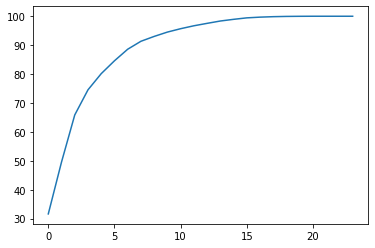

In [113]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_ * 100, 2)))
np.cumsum(np.round(pca.explained_variance_ratio_ * 100, 2))

In [116]:
# let's run PCA with 8 components now 

pca = PCA(n_components=8)
pca_predictors = pca.fit_transform(X_train[features])

In [117]:
def eval_model_pc(model):
    cv = cross_val_score(model, pca_predictors, train['epm'], cv = 5, scoring='neg_mean_absolute_error')
    print(cv)
    return -1 * np.mean(cv)

In [119]:
lr = LinearRegression()
eval_model_pc(lr)

[-1.50819685 -1.64412494 -1.50965645 -1.54529784 -1.49044378]


1.539543972352328

In [120]:
rf = RandomForestRegressor()
eval_model_pc(rf)

[-1.57451948 -1.67837795 -1.51109637 -1.55985742 -1.55470971]


1.575712186962842

In [121]:
xgb = XGBRegressor()
eval_model_pc(xgb)

[-1.66743827 -1.81894188 -1.56725624 -1.6847493  -1.61854524]


1.67138618669828

In [122]:
knn = KNeighborsRegressor(n_neighbors = 25)
eval_model_pc(knn)

[-1.54229191 -1.68097202 -1.52297572 -1.56945002 -1.53496245]


1.5701304240074379

In [123]:
eval_model_pc(mlp)

[-1.49288964 -1.64094111 -1.49018079 -1.5346483  -1.51979351]


1.5356906693564243

In [124]:
# manually selecting features using correlations and baseline models

best_features = ['value_over_replacement_player', 'age', 'minutes_played', 'player_efficiency_rating', 'true_shooting_percentage',
'three_point_attempt_rate', 'turnover_percentage', 'win_shares', 'defensive_box_plus_minus']

def eval_model_9_predictors(model):
    cv = cross_val_score(model, X_train[best_features], train['epm'], cv = 5, scoring='neg_mean_absolute_error')
    print(cv)
    return -1 * np.mean(cv)

In [125]:
eval_model_9_predictors(lr)

[-1.49679602 -1.638164   -1.50644501 -1.52230335 -1.47321774]


1.5273852249874675

In [126]:
eval_model_9_predictors(rf)

[-1.53526883 -1.63903239 -1.53081809 -1.56888661 -1.51718151]


1.5582374870705906

In [127]:
eval_model_9_predictors(xgb)

[-1.62060635 -1.69329772 -1.62133322 -1.64834113 -1.58721367]


1.634158420064648

In [128]:
eval_model_9_predictors(mlp)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names,

[-1.47746171 -1.64550134 -1.47300869 -1.52152539 -1.50854977]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names,

1.5252093817506323

In [129]:
eval_model_9_predictors(knn)

[-1.51594863 -1.69821387 -1.54123944 -1.55064553 -1.52054976]


1.5653194473058973

In [130]:
from sklearn.svm import SVR
svr = SVR()
eval_model_9_predictors(svr)

[-1.47824157 -1.62282602 -1.49588544 -1.49748794 -1.51389332]


1.5216668585945397

In [ ]:
# Final models to optimize:

# 1) Linear Regression 
# 2) Support Vectors Regressor
# 3) Random Forest
# 4) K-Nearest Neighbors 

In [132]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# Create a based model
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, train['epm'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  22.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  13.8s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  13.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [134]:
eval_model(rf)

[-1.50083052 -1.6510991  -1.48752779 -1.56008734 -1.48320562]


1.5365500722473342

In [135]:
eval_model(rf_random.best_estimator_)

[-1.49481765 -1.64612896 -1.47944591 -1.5206779  -1.48751494]


1.5257170743467032

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()


params = dict(n_neighbors = range(10, 20), weights = ['uniform' , 'distance'], leaf_size = range(20, 50, 5), 
              metric = ['minkowski', 'euclidean', 'manhattan'])

clf = GridSearchCV(knn, params, cv = 5)
search = clf.fit(X_train[best_features], train['epm'])
search.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 17,
 'weights': 'distance'}

In [140]:
eval_model_9_predictors(knn)

[-1.63205763 -1.77430101 -1.63194899 -1.59745007 -1.65390532]


1.657932604093458

In [141]:
eval_model_9_predictors(search.best_estimator_)

[-1.51368413 -1.69533559 -1.5457561  -1.53795157 -1.51954683]


1.5624548447347795